In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/tips.csv"
)

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
df.shape


(244, 7)

In [8]:
df.columns


Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [10]:
df.isnull().sum()


,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [11]:
df.duplicated().sum()


np.int64(1)

In [14]:
df = df.drop_duplicates()


Removed duplicate records to maintain data quality.

In [15]:
df.describe()

,total_bill,tip,size
count,243.000000,243.000000,243.000000
mean,19.813868,3.002387,2.572016
std,8.910071,1.385002,0.952356
min,3.070000,1.000000,1.000000
25%,13.380000,2.000000,2.000000
50%,17.810000,2.920000,2.000000
75%,24.175000,3.575000,3.000000
max,50.810000,10.000000,6.000000


In [16]:
df['day'].value_counts()

,count
day,
Sat,87
Sun,76
Thur,61
Fri,19


In [17]:
df['time'].value_counts()


,count
time,
Dinner,176
Lunch,67


# **Average Bill by Day**

In [18]:
avg_bill_day = df.groupby('day')['total_bill'].mean()
avg_bill_day

,total_bill
day,
Fri,17.151579
Sat,20.441379
Sun,21.410000
Thur,17.759508


# **Total Sales by Time (Lunch vs Dinner)**

In [19]:
df.groupby('time')['total_bill'].sum()

,total_bill
time,
Dinner,3660.30
Lunch,1154.47


# **Tip Percentage**

In [20]:
df['tip_percent'] = (df['tip'] / df['total_bill']) * 100
df[['total_bill', 'tip', 'tip_percent']].head()

,total_bill,tip,tip_percent
0,16.99,1.01,5.944673
1,10.34,1.66,16.054159
2,21.01,3.50,16.658734
3,23.68,3.31,13.978041
4,24.59,3.61,14.680765


# **Visual Analysis**

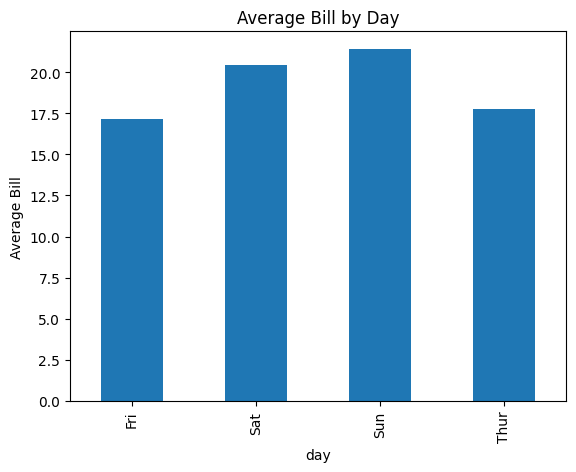

In [21]:
plt.figure()
avg_bill_day.plot(kind='bar')
plt.title('Average Bill by Day')
plt.ylabel('Average Bill')
plt.show()

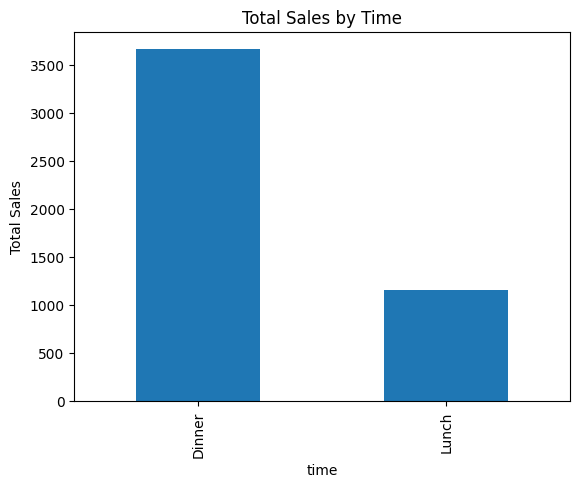

In [22]:
plt.figure()
df.groupby('time')['total_bill'].sum().plot(kind='bar')
plt.title('Total Sales by Time')
plt.ylabel('Total Sales')
plt.show()